In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


### Data Loading

In [3]:
df = pd.read_csv("/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv")
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
def displayinfo(name,info):
    print(f"\n{name} : {info}")
    

In [5]:
displayinfo("Rows",df.shape[0])
displayinfo("Columns",df.shape[1])
displayinfo("Columns Name",df.columns.to_list())
displayinfo("Unique\n",df.nunique())


Rows : 48895

Columns : 16

Columns Name : ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

Unique
 : id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64


In [6]:
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap

### Plotting Dataset in a map

In [7]:
Long=-73.80
Lat=40.80
locations = list(zip(df.latitude,df.longitude))

map1 = folium.Map(location = [Lat,Long],zoom_start = 9)
FastMarkerCluster(data=locations).add_to(map1)
map1

In [8]:
#For Nan Values in column reviews_per_month,replacing Nan with 0
df.fillna({"reviews_per_month":0},inplace=True)

### Scatter Plot to show the neighbourhood group based on Latitude and Longitude

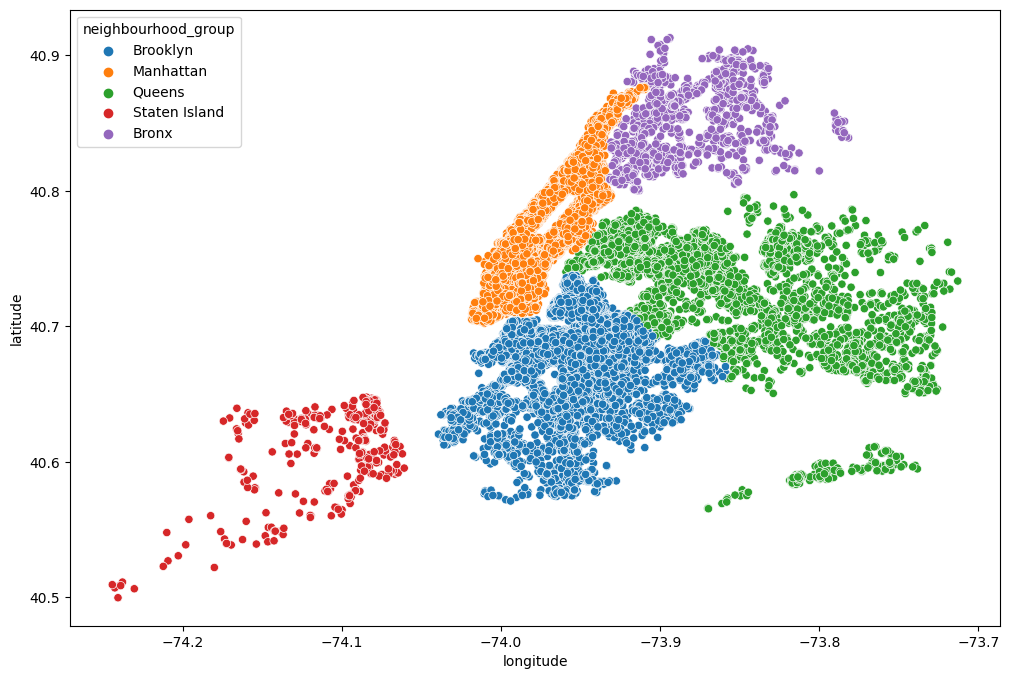

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.scatterplot(y=df.latitude,x=df.longitude,hue=df.neighbourhood_group)
plt.show()

In [10]:
#Unique Values

print('Unique value for room_type are :',df.room_type.unique())
print('Unique value for neighbourhood_group are :',df.neighbourhood_group.unique())

Unique value for room_type are : ['Private room' 'Entire home/apt' 'Shared room']
Unique value for neighbourhood_group are : ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


<Axes: xlabel='room_type'>

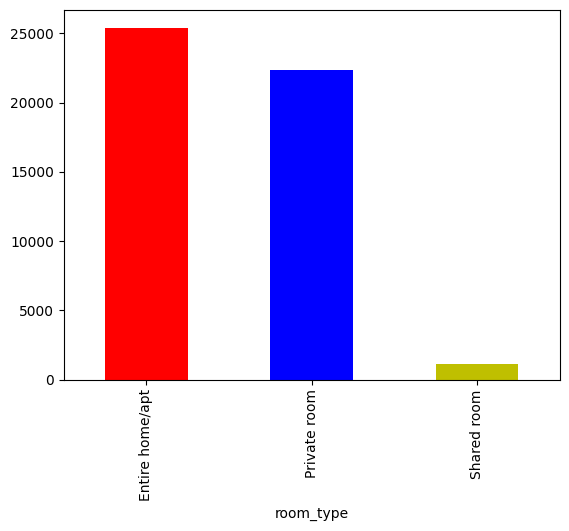

In [11]:
df['room_type'].value_counts().plot(kind='bar',color=['r','b','y'])

In [12]:
# Set visualization style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"]=(12,8)

### Data Cleaning

In [13]:
# Convert price to numeric (if stored as string with "$" or commas)
df['price'] = df['price'].replace({'\$': '', ',': ''},regex=True).astype(float)

In [14]:
#Check For Missing Values
missing = df.isnull().sum().sort_values(ascending = False)
print("Missing values per column:\n", missing[missing > 0])

Missing values per column:
 last_review    10052
host_name         21
name              16
dtype: int64


### Univarate Analysis

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


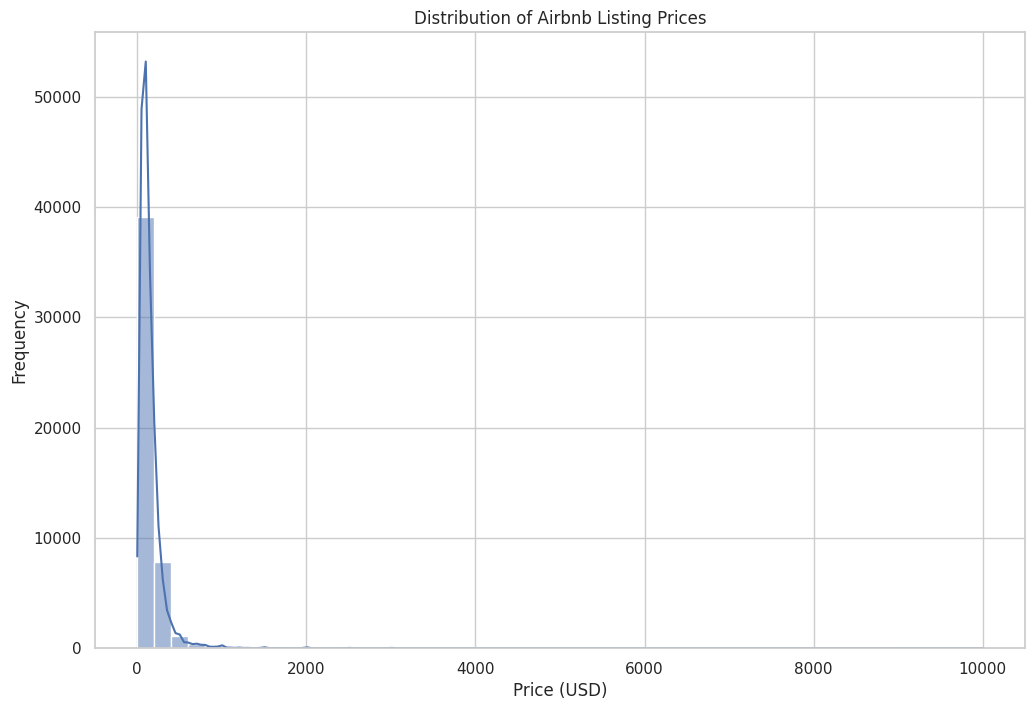

In [15]:
#Plot distribution of Prices
sns.histplot(df['price'],bins=50,kde=True)
plt.title("Distribution of Airbnb Listing Prices")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


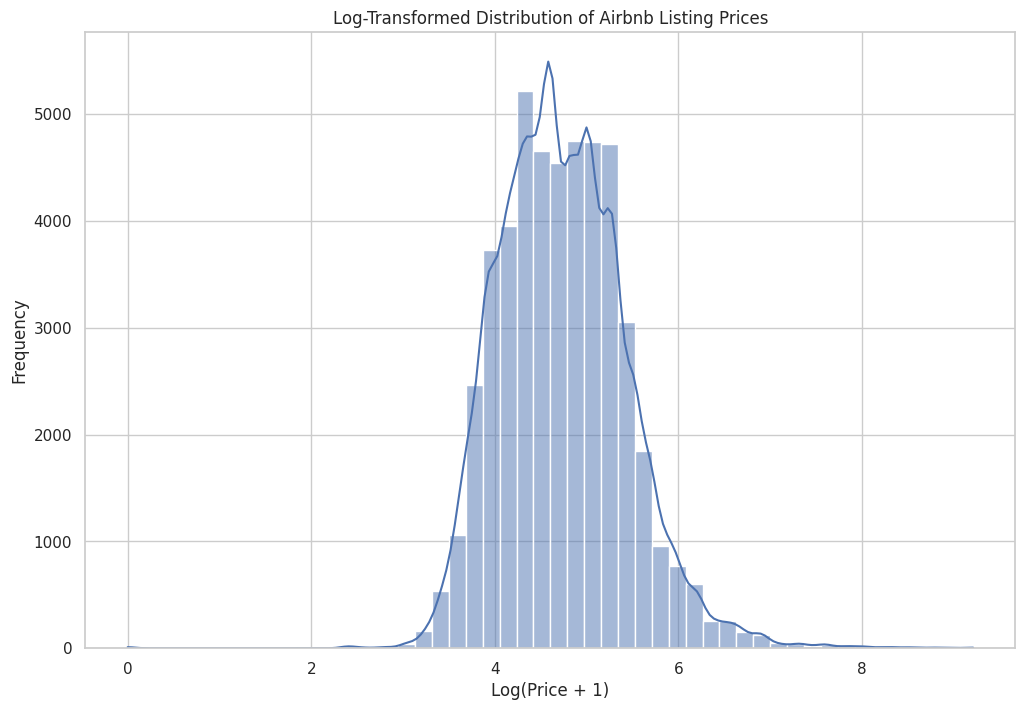

In [16]:
# Log-transform the price for better visualization of skewed data
sns.histplot(np.log(df['price'] + 1), bins=50, kde=True)
plt.title("Log-Transformed Distribution of Airbnb Listing Prices")
plt.xlabel("Log(Price + 1)")
plt.ylabel("Frequency")
plt.show()

### Bivariate Analysis

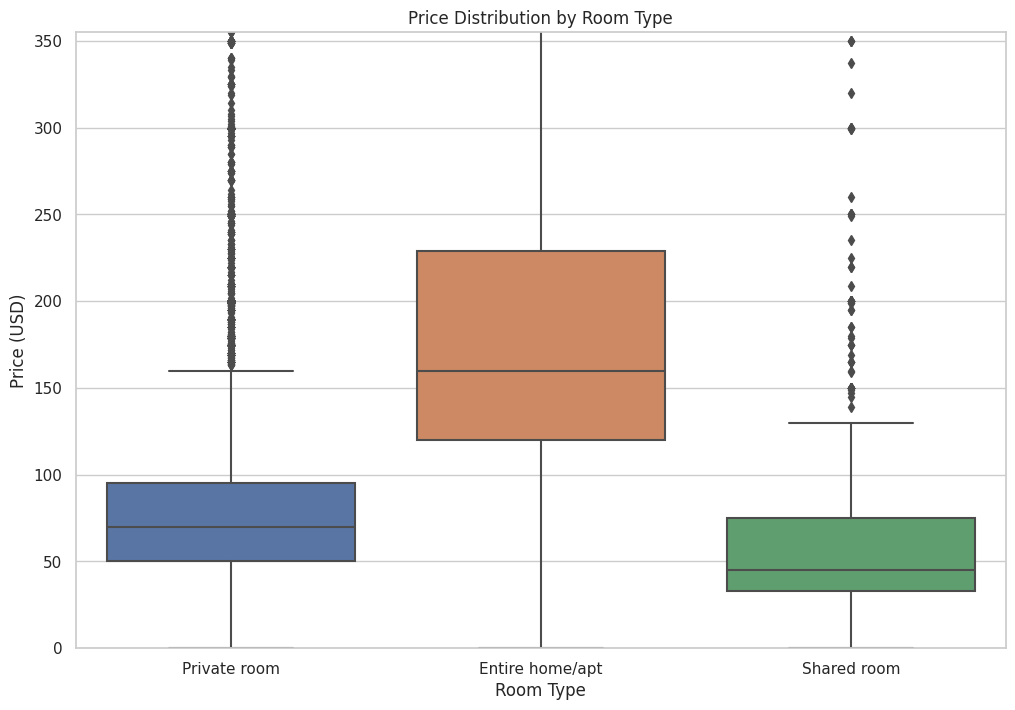

In [17]:
# Price vs. Room Type (Boxplot)
sns.boxplot(x='room_type', y='price', data=df)
plt.title("Price Distribution by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Price (USD)")
plt.ylim(0, df['price'].quantile(0.95))  # focus on 95th percentile to reduce outlier effect
plt.show()

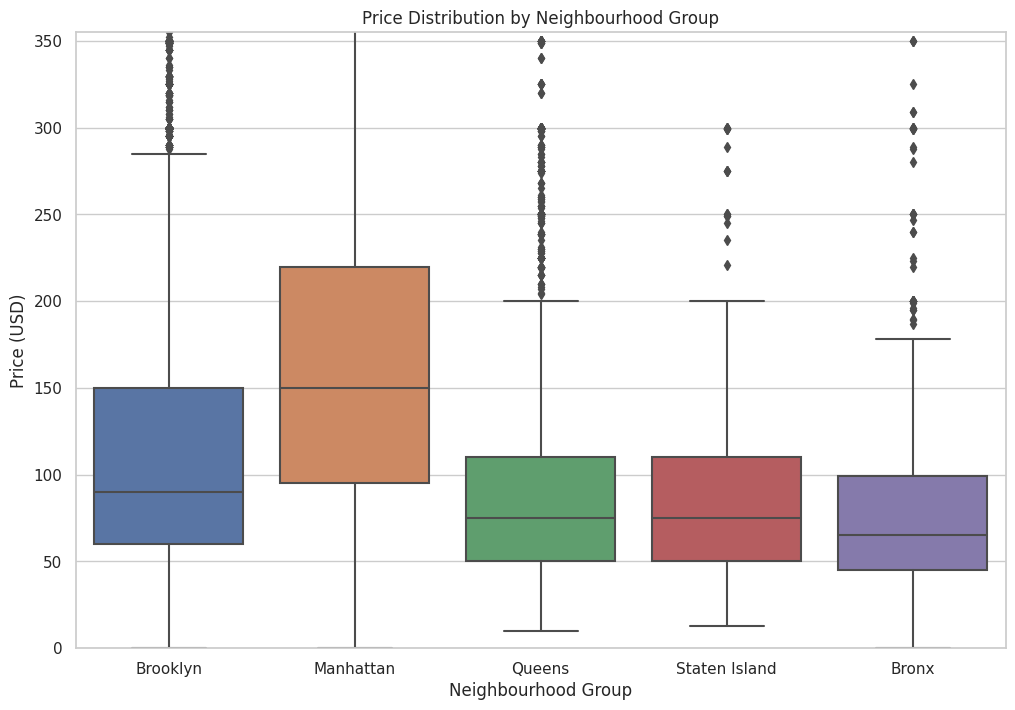

In [18]:
# Price vs. Neighbourhood Group (Boxplot)
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.title("Price Distribution by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price (USD)")
plt.ylim(0, df['price'].quantile(0.95))
plt.show()

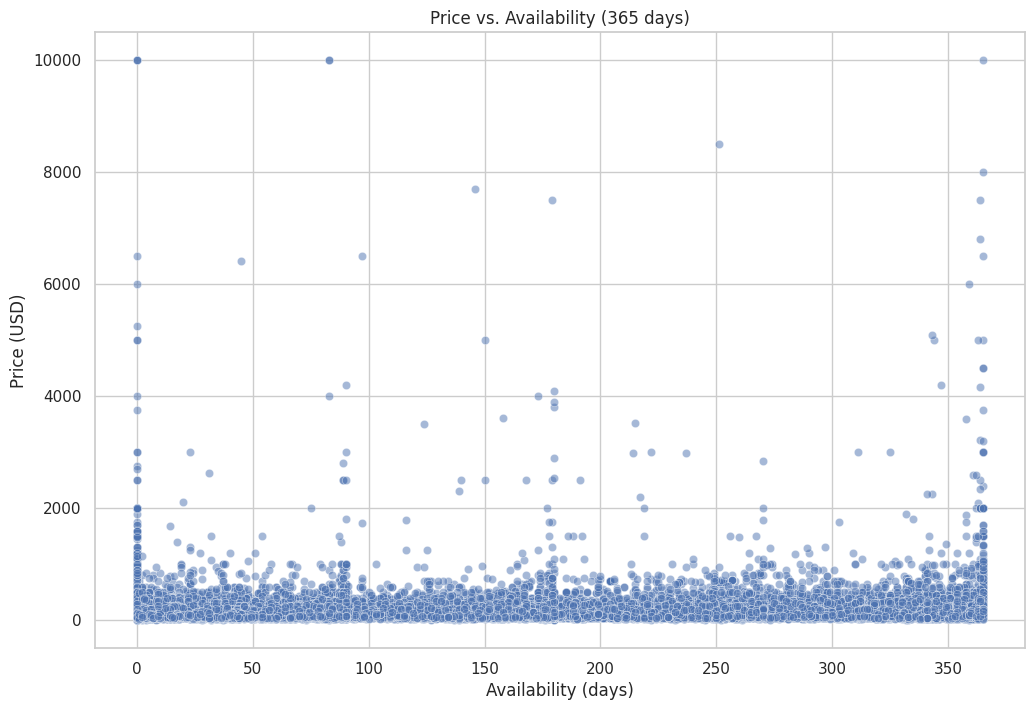

In [19]:
# Scatter plot: Price vs. Availability (e.g., availability_365)
sns.scatterplot(x='availability_365', y='price', data=df, alpha=0.5)
plt.title("Price vs. Availability (365 days)")
plt.xlabel("Availability (days)")
plt.ylabel("Price (USD)")
plt.show()

### Amenities Analysis (Parsing and Visualization)


In [20]:
df['amenities_clean'] = df['name'].str.replace('[\[\]"]', '', regex=True)
df['amenities_list'] = df['amenities_clean'].str.split(',')

In [21]:
amenities_df = df[['id', 'amenities_list']].explode('amenities_list')
amenities_df['amenities_list'] = amenities_df['amenities_list'].str.strip()

In [22]:
top_amenities = amenities_df['amenities_list'].value_counts().head(20)
print(top_amenities)

amenities_list
Sunny        277
Bright       261
Spacious     245
Cozy         241
Brooklyn     221
Clean        141
Large        135
Beautiful    123
Quiet        109
Modern        95
NY            93
NYC           92
Private       81
Manhattan     71
Charming      64
BK            64
Huge          45
Lovely        41
clean         40
cozy          39
Name: count, dtype: int64


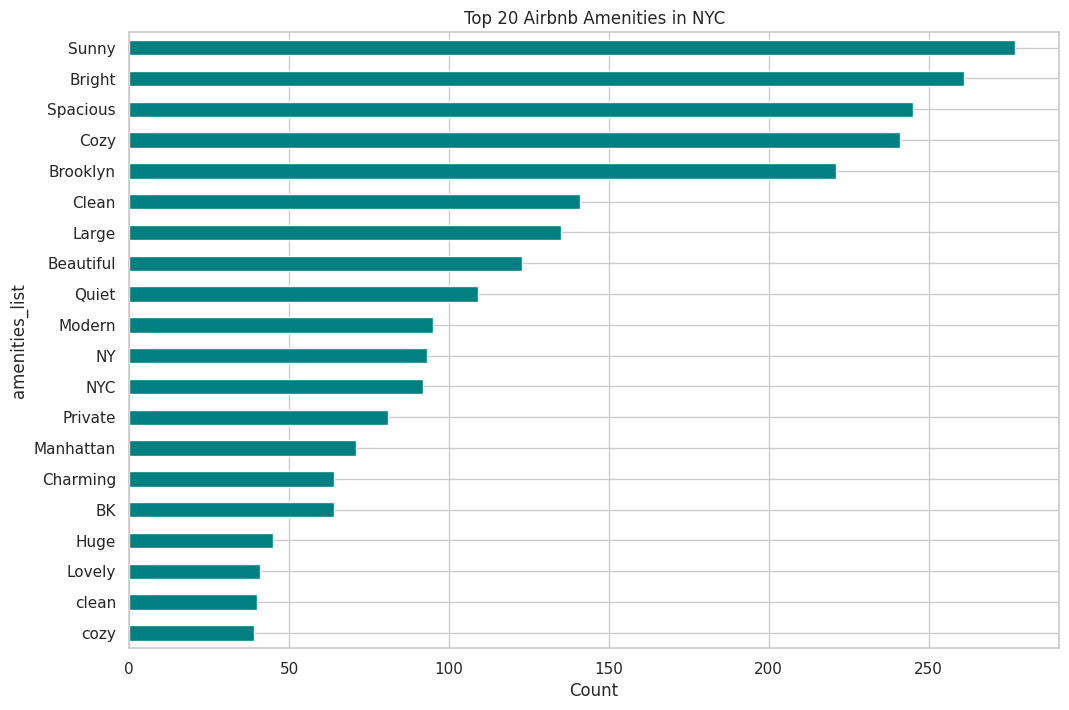

In [23]:
# Plot top 20 amenities
top_amenities.sort_values().plot(kind='barh', color='teal')
plt.xlabel("Count")
plt.title("Top 20 Airbnb Amenities in NYC")
plt.show()